## 5

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

# Step (a): Generate dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)


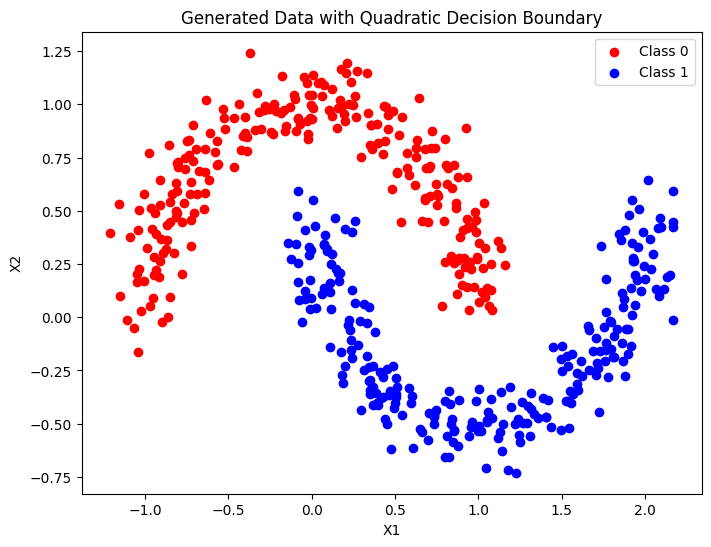

In [30]:

# Step (b): Plot observations
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Data with Quadratic Decision Boundary')
plt.legend()
plt.show()


In [31]:

# Step (c): Fit logistic regression with linear terms
log_reg_linear = LogisticRegression()
log_reg_linear.fit(X, y)


LogisticRegression()

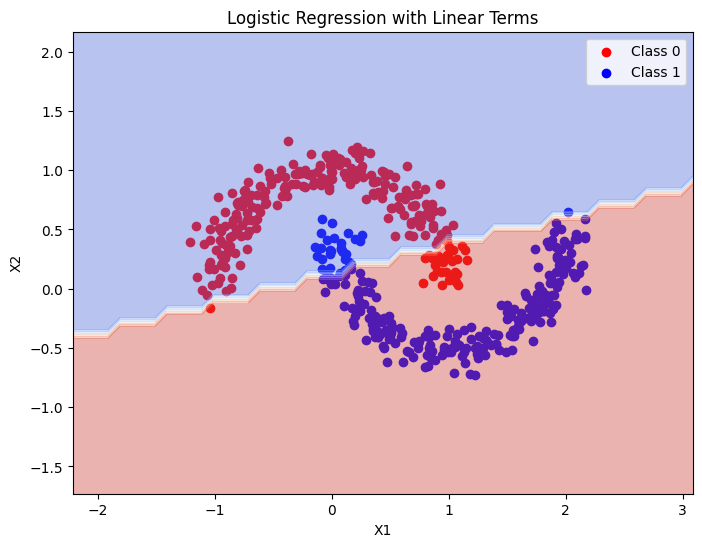

In [32]:

# Step (d): Plot predictions (linear)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Linear Terms')
plt.legend()

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = log_reg_linear.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.show()


In [33]:

# Step (e): Fit logistic regression with non-linear terms
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
log_reg_non_linear = LogisticRegression()
log_reg_non_linear.fit(X_poly, y)


LogisticRegression()

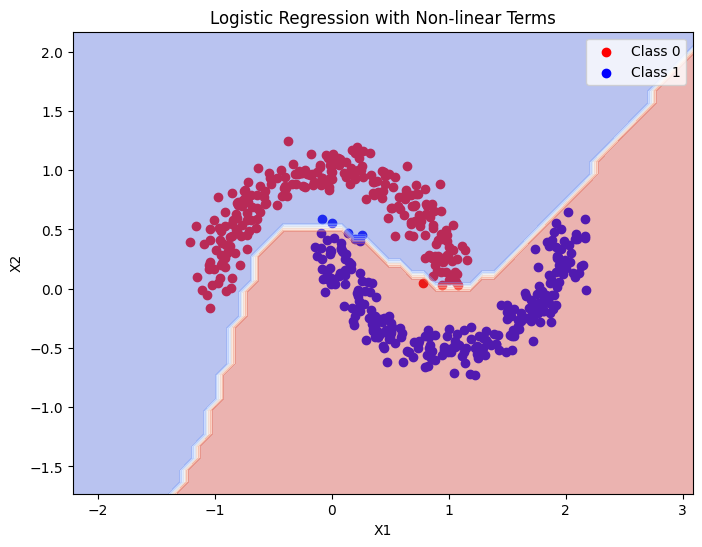

In [34]:

# Step (f): Plot predictions (non-linear)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Non-linear Terms')
plt.legend()
# Plot decision boundary
Z = log_reg_non_linear.predict(poly.transform(np.c_[xx1.ravel(), xx2.ravel()]))
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.show()

In [35]:

# Step (g): Fit SVC
svc = SVC(kernel='linear')
svc.fit(X, y)


SVC(kernel='linear')

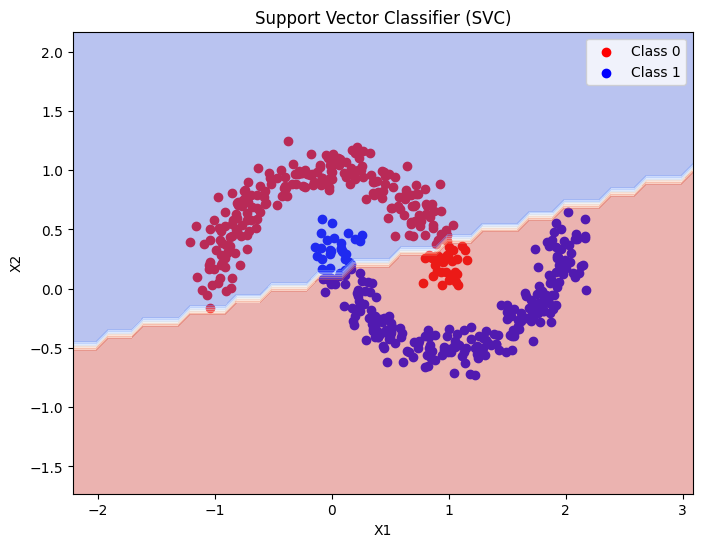

In [36]:

# Step (h): Plot predictions (SVC)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Support Vector Classifier (SVC)')
plt.legend()

# Plot decision boundary
Z = svc.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.show()


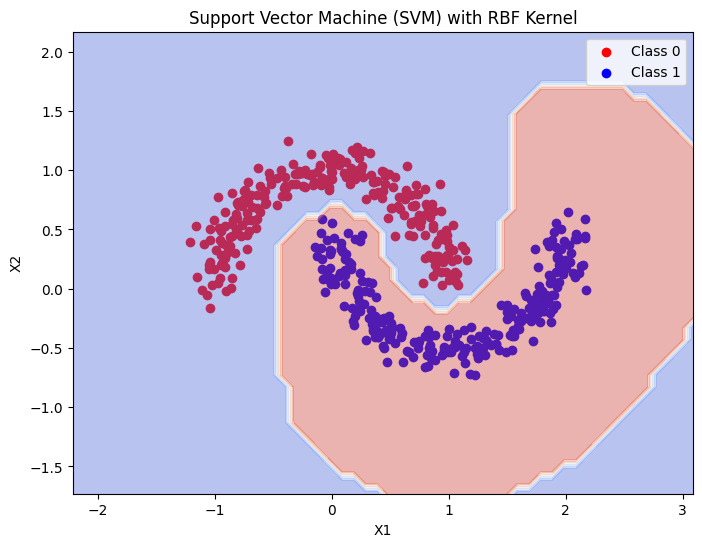

In [37]:

# Step (i): Fit SVM with non-linear kernel
svm = SVC(kernel='rbf', gamma=2)
svm.fit(X, y)

# Plot predictions (SVM)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Support Vector Machine (SVM) with RBF Kernel')
plt.legend()

# Plot decision boundary
Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.show()


## 7

In [81]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import patsy as pt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

auto_df = pd.read_csv("/Users/rj/Downloads//Auto.csv")

auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto_df[quants] = auto_df[quants].astype(np.float64)
auto_df['mpg_above_median'] = (auto_df['mpg'] > auto_df['mpg'].median()) *1.
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


In [82]:
auto_df['origin']=auto_df['origin'].astype('category')
auto_df['origin'].value_counts()

origin
1.0    245
3.0     79
2.0     68
Name: count, dtype: int64

In [83]:
auto_df['origin'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0], ordered=False, categories_dtype=float64)

In [84]:
# B
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year'
y, X = pt.dmatrices(f, auto_df)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)


In [79]:
costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = svm.SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)

,Cost,CV_accuracy
0,0.000010,0.612853
1,0.000023,0.612853
2,0.000055,0.612853
3,0.000127,0.612853
4,0.000298,0.625511
5,0.000695,0.769815
6,0.001624,0.836157
7,0.003793,0.874651
8,0.008859,0.902921
9,0.020691,0.900487


/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

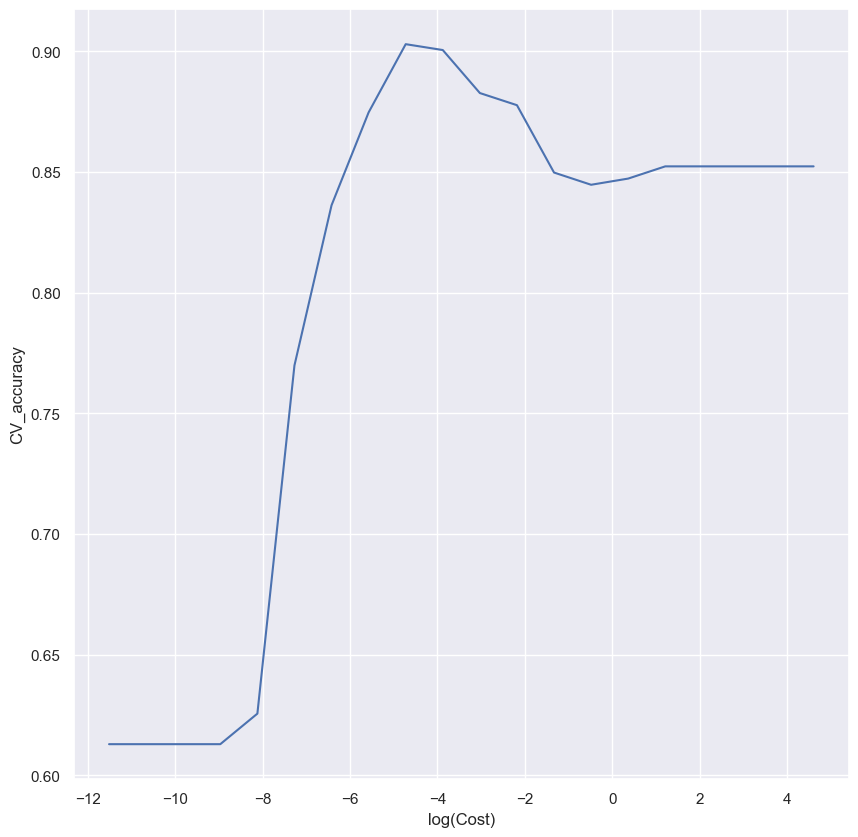

In [85]:
results_df['log(Cost)'] = np.log(results_df['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=results_df);

In [86]:
# C
C_range     = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels     = ['rbf', 'poly']
degrees     = [3, 5, 7, 9]     # Using only odd values, because I noticed earlier evens are slow!
param_grid  = dict(gamma=gamma_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(svm.SVC(cache_size=2000), param_grid=param_grid, cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(cache_size=2000),
             param_grid={'C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [87]:

pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
408,0.000817,0.000031,0.000556,0.000019,0.278256,3,0.035938,rbf,"{'C': 0.2782559402207126, 'degree': 3, 'gamma'...",0.911392,...,0.905550,0.026580,1,0.916933,0.910543,0.917197,0.914013,0.920382,0.915814,0.003318
428,0.000816,0.000025,0.000558,0.000024,0.278256,5,0.035938,rbf,"{'C': 0.2782559402207126, 'degree': 5, 'gamma'...",0.911392,...,0.905550,0.026580,1,0.916933,0.910543,0.917197,0.914013,0.920382,0.915814,0.003318
468,0.000803,0.000028,0.000567,0.000022,0.278256,9,0.035938,rbf,"{'C': 0.2782559402207126, 'degree': 9, 'gamma'...",0.911392,...,0.905550,0.026580,1,0.916933,0.910543,0.917197,0.914013,0.920382,0.915814,0.003318
448,0.000804,0.000025,0.000568,0.000034,0.278256,7,0.035938,rbf,"{'C': 0.2782559402207126, 'degree': 7, 'gamma'...",0.911392,...,0.905550,0.026580,1,0.916933,0.910543,0.917197,0.914013,0.920382,0.915814,0.003318
526,0.000796,0.000020,0.000534,0.000012,2.154435,7,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.886076,...,0.903051,0.026359,5,0.913738,0.897764,0.917197,0.907643,0.920382,0.911345,0.007998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.001276,0.000013,0.000512,0.000022,0.278256,9,0.004642,poly,"{'C': 0.2782559402207126, 'degree': 9, 'gamma'...",0.493671,...,0.497468,0.003101,744,0.501597,0.501597,0.512739,0.512739,0.512739,0.508282,0.005458
58,0.001335,0.000026,0.000968,0.000014,0.00001,7,1000.0,rbf,"{'C': 1e-05, 'degree': 7, 'gamma': 1000.0, 'ke...",0.493671,...,0.497468,0.003101,744,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
638,0.001584,0.000141,0.000953,0.000006,16.681005,9,1000.0,rbf,"{'C': 16.681005372000556, 'degree': 9, 'gamma'...",0.493671,...,0.497468,0.003101,744,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
298,0.001315,0.000011,0.000993,0.000030,0.004642,7,1000.0,rbf,"{'C': 0.004641588833612777, 'degree': 7, 'gamm...",0.493671,...,0.497468,0.003101,744,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166


## Comment
as we can see the radial kernal performs the best with a mean test score accuracy of .906, which is higher than the linear kernal by .3.

## 8

In [92]:
oj_df = pd.read_csv('/Users/rj/Downloads/OJ.csv')
oj_df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [93]:
#a
preds = "+".join(oj_df.columns.drop("Purchase"))
f = f'Purchase ~ {preds}'
y, X = pt.dmatrices(f, oj_df)
y = y[:, 0]

# scale data
X = preprocessing.scale(X)

# Split training test sets
test_size = len(y)-800
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rj/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

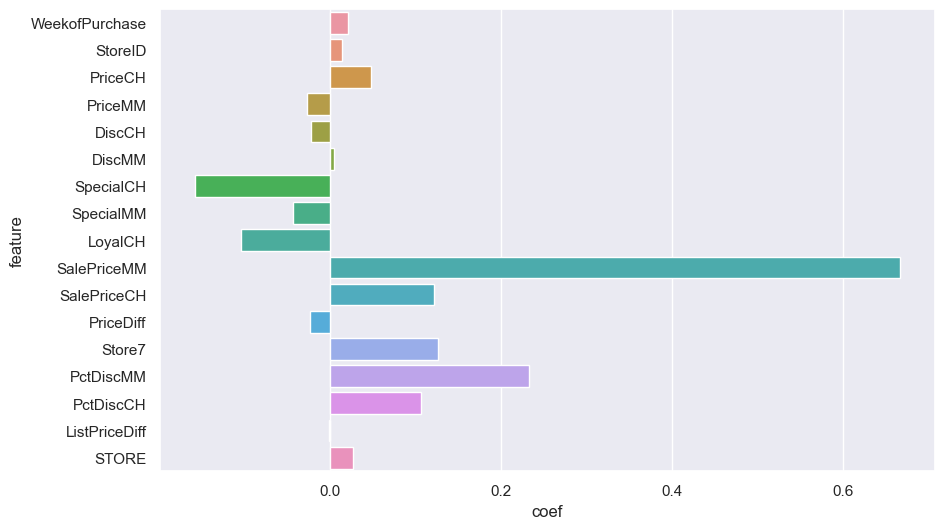

In [94]:
#b
model = svm.LinearSVC(C=0.1, random_state=0).fit(X_train, y_train)

df = pd.DataFrame({'feature': oj_df.columns.drop('Purchase'),
              'coef': np.ravel(model.coef_)[1:]})
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='feature', data=df);

In [95]:
#c
accuracy_train = model.score(X_train, y_train)
accuracy_test  = model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.840
test accuracy : 0.830


In [96]:
#d
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/rj/Librar

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])},
             return_train_score=True, scoring='accuracy')

In [97]:
#e
accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.831
test accuracy : 0.841


In [98]:
#f
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.851
test accuracy : 0.844


In [99]:
#g
C_range     = np.logspace(-2, 1, 10)
param_grid  = dict(C=C_range)
model_grid  = GridSearchCV(svm.SVC(kernel='poly', degree=2), param_grid=param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)
model_grid.fit(X, y)

accuracy_train = model_grid.score(X_train, y_train)
accuracy_test  = model_grid.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.806
test accuracy : 0.767


# H
The support vector machine with the radial kernal because it had the highest test and train accuracy